# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [10]:
boston['target']
boston['data']
type(boston)

sklearn.utils.Bunch

In [11]:
boston.data.shape

(506, 13)

In [12]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [17]:
type(boston.feature_names) # numpy array of strings

numpy.ndarray

In [18]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [23]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [24]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [25]:
print(boston.target.shape) # in DataCamp y= y.reshape(-1,1) so ambiguity eliminated

(506,)


In [26]:
bos['PRICE'] = boston.target #adding the separate key of dict
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [27]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

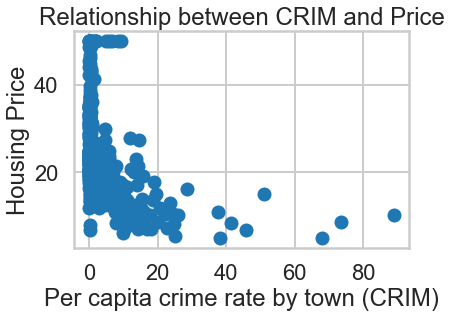

In [28]:
plt.scatter(bos.CRIM, bos.PRICE) # plt for Pandas series (note dot notation, not square brackets)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

# your turn: describe relationship
There are multiple observations that can be made from the plot between the housing price and the per capita crime rate:

1. There appears to be a negative correlation between the housing price and the per capita crime rate. 

2. A significant fraction of the data points are for the per capita crime rate less than about 20. This means that majority of housing units are in the area where per capita crime rate is pretty low. 

3. The rate at which the housing price decrease is minimal once the per capita crime rate increases beyond about 20. 

4. The spread in the housing price decreases by increasing the per capita crime rate. This behaviour is strange because usually the fluctuation decreases by increasing the number of samples. However, in this case, the variance in housing price is smaller even when the number of data points are lower for higher per capita crime rate. On the other hand, the variance in housing prices are higher for lower per capita crime rate where we have lots of data points. 

5. The relationship is not linear. 


To clarify above points, especially point# 2 and 5, we can try to plot the housing price against the log of the per capita crime rate. The resulting plot below can be seen as following a negative linear trend: 

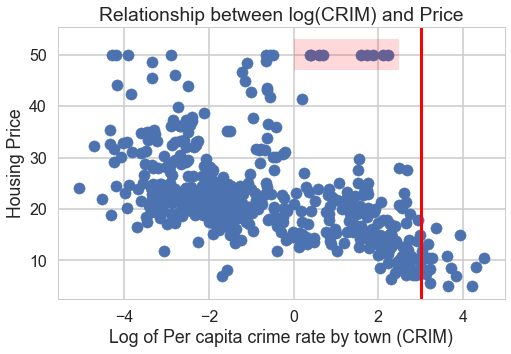

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(np.log(bos.CRIM), bos.PRICE)
ax.fill_between([0,2.5], 47, 53, facecolor='red', alpha = .15, interpolate=True)
plt.axvline(x=3, linewidth=3, color='red')
plt.xlabel("Log of Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between log(CRIM) and Price")

Still there are some data points that are far off from the linear trend. These data points are shaded in red and are probably outliers. It seems that all the data points in the red shaded area have housing price = 50. This could be a data entering error. The red vertical line indicates the per capita crime rate = 20.   

Text(0.5, 1.0, 'Relationship between RM and Price')

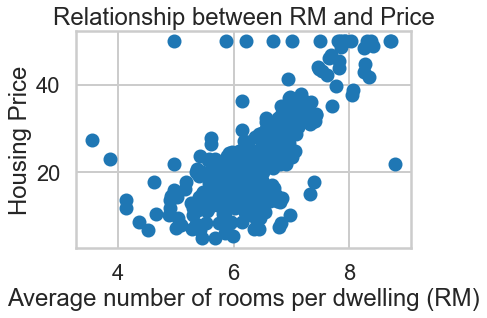

In [29]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE) # respectively x & y
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

We observe a positive linear relationship between the housing price and the average number of rooms per dwelling (RM). Similar to previous plot on CRIM, here also we see some outliers that have housing price = 50. Also, the number of data points are crowded significantly around RM = 6 (which was also the case for CRIM plot where CRIM = 20 or less corresponded a big fraction of the data points).

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

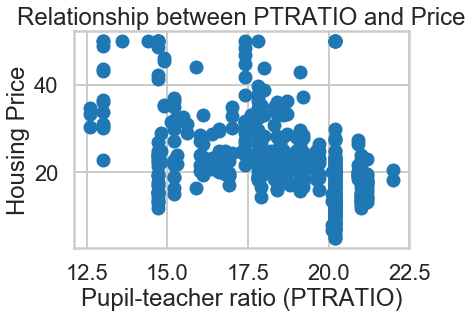

In [30]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

There appears a general negative trend for housing price as a function of pupil-teacher ratio (PTRATIO), however, a large spread in housing values across the values of PTRATIO does not suggest a clear picture of a linear relationship. 

In [31]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

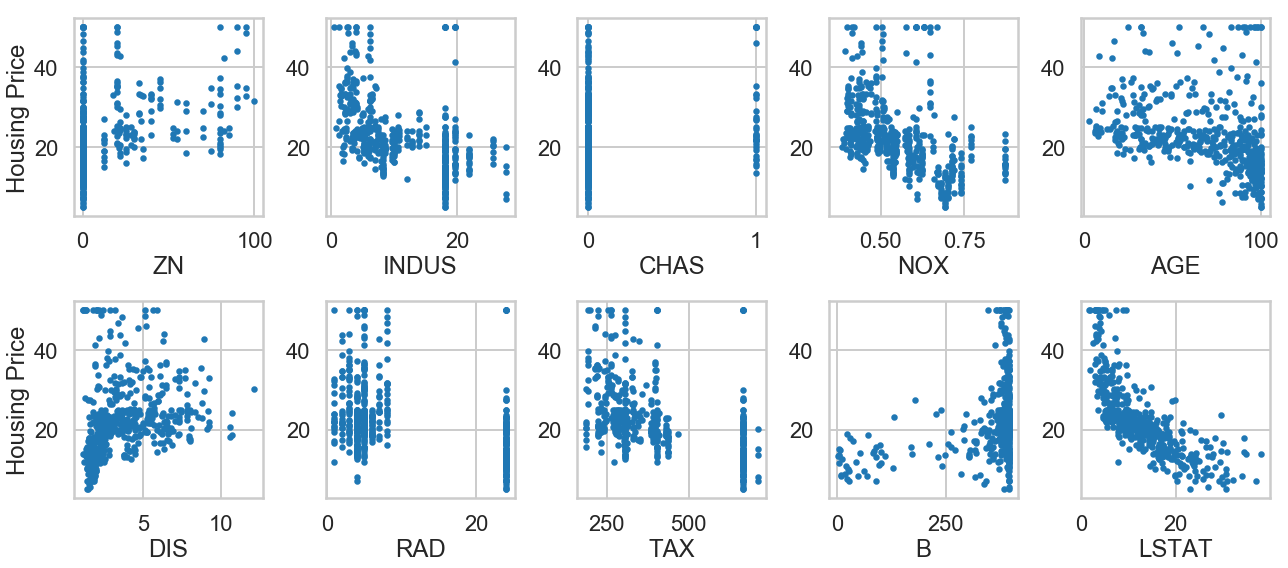

In [32]:
# your turn: create some other scatter plots
cols = ["ZN", "INDUS", "CHAS", "NOX", "AGE", "DIS", "RAD", "TAX", "B", "LSTAT"]
r = 2
c = 5
fig, ax1 = plt.subplots(r, c, figsize=(18,8))

for i in np.arange(r):
    for j in np.arange(c):
        cid = j + (i*c)
        ax1[i,j].scatter(bos[cols[cid]], bos.PRICE, s=20)
        ax1[i,j].set_xlabel(cols[cid])
        if j==0:
            ax1[i,j].set_ylabel("Housing Price")
plt.tight_layout()

Except for CHAS (Charles River dummy variable), all other variables can be thought of as non-categorical variables.
Looking at all other variables, three variables seem to have a reasonable correlations with the housing price:
1. INDUS(proportion of non-retail business acres per town) with a negative trend, 
2. DIS(weighted distances to five Boston employment centres) with a positive trend, and
3. LSTAT (lower status of the population) with a negative trend.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


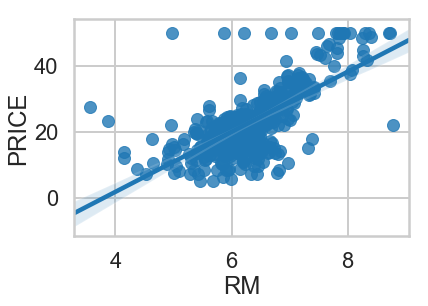

In [33]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


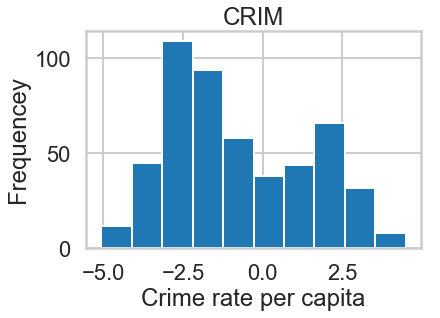

In [34]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

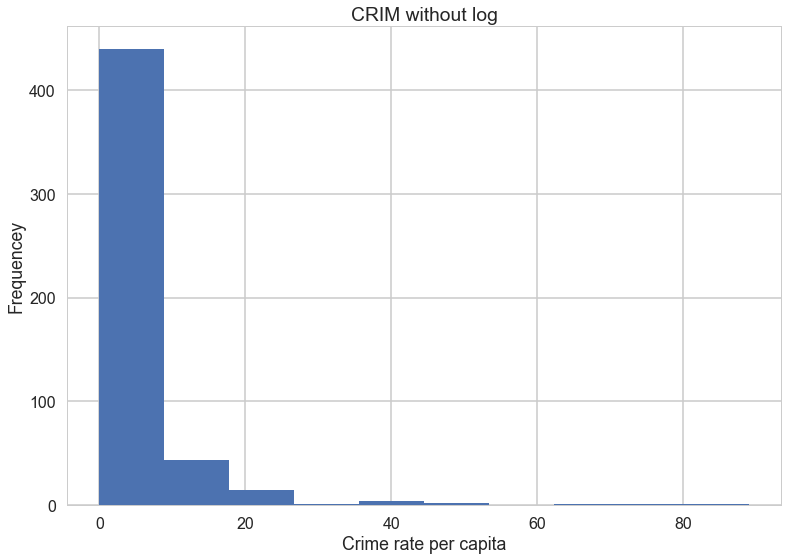

In [529]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM without log")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

If the log is NOT taken, then the crime rate appears to decline exponentially.
However, taking the log of CRIM reveals the distribution is bimodal  . 

Lets now plot some more histograms and try to find correlations in predictors.

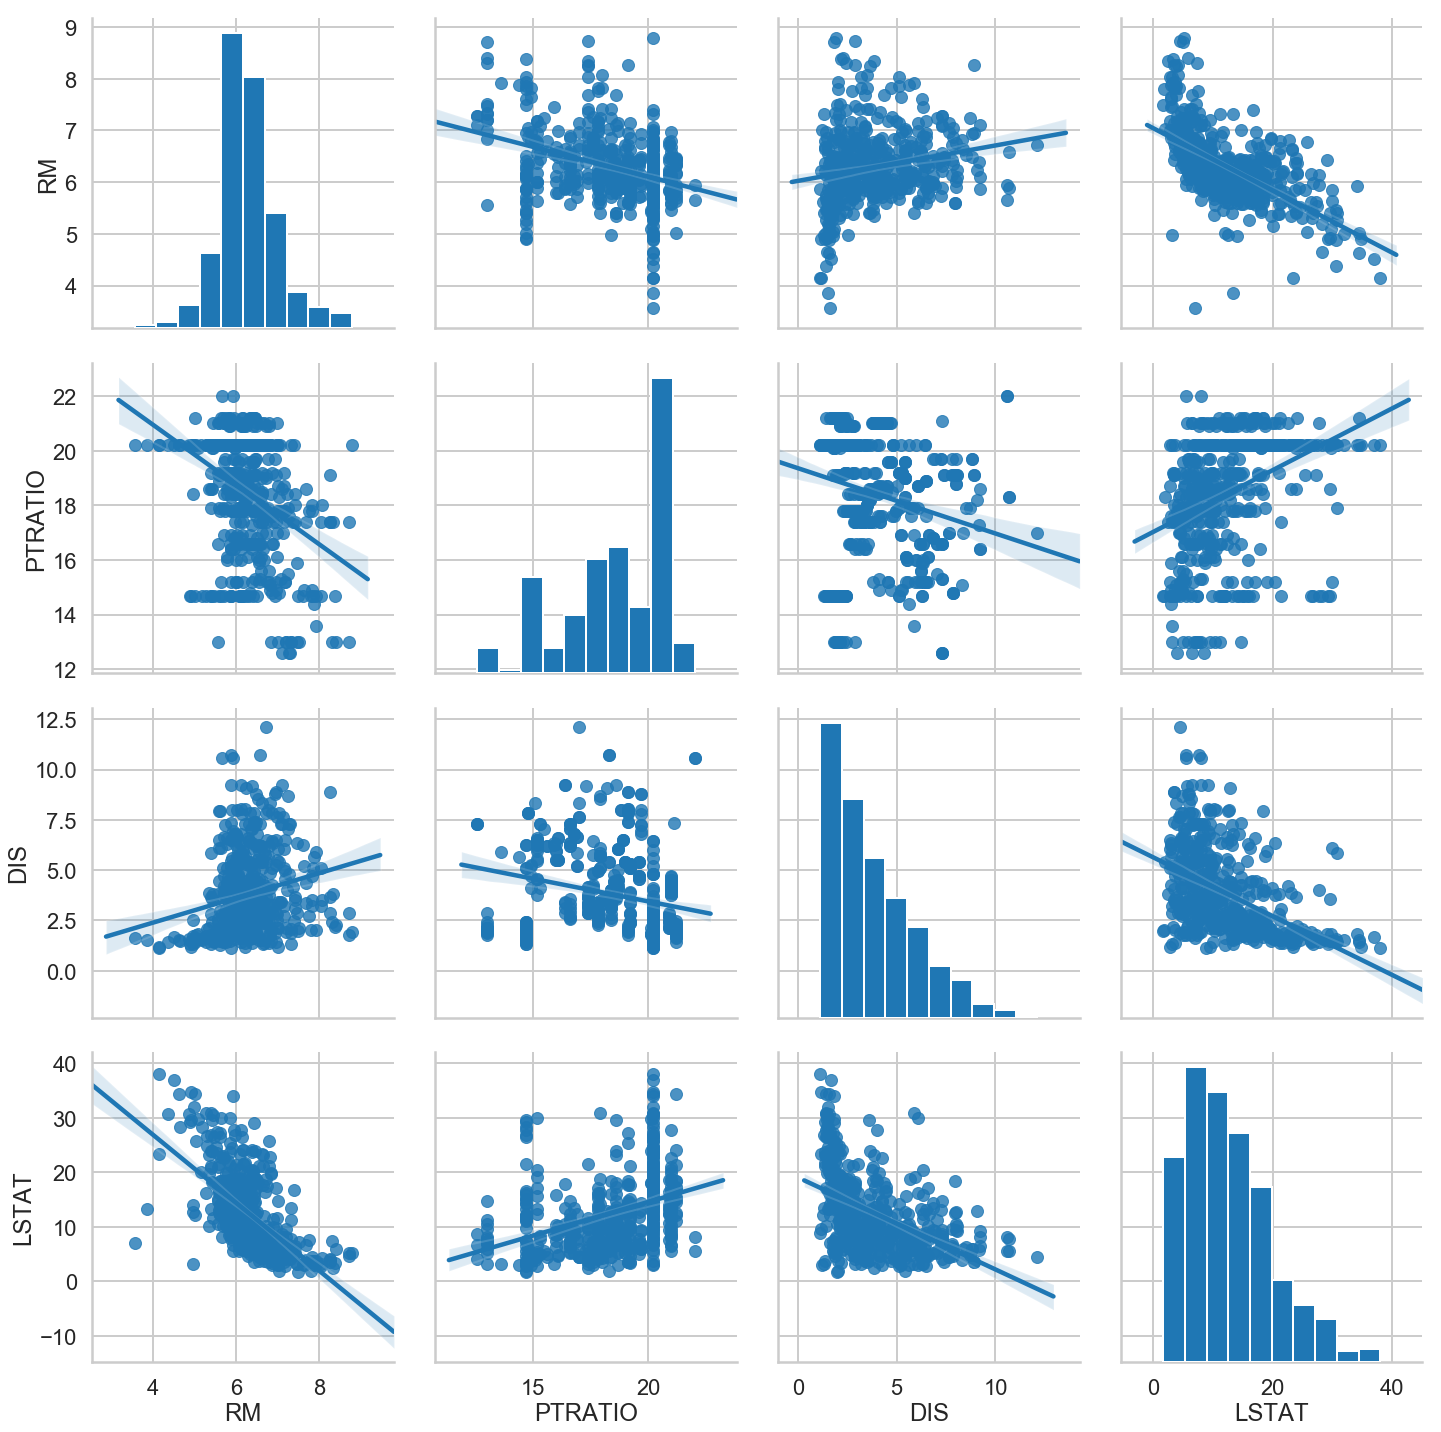

In [36]:
pp = sns.pairplot(bos, vars=["RM", "PTRATIO", "DIS", "LSTAT"], height=5, kind="reg")

Distributions for both DIS and LSTAT look pretty positively skewed. So, lets take the log of these two variables and replot the above plots.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


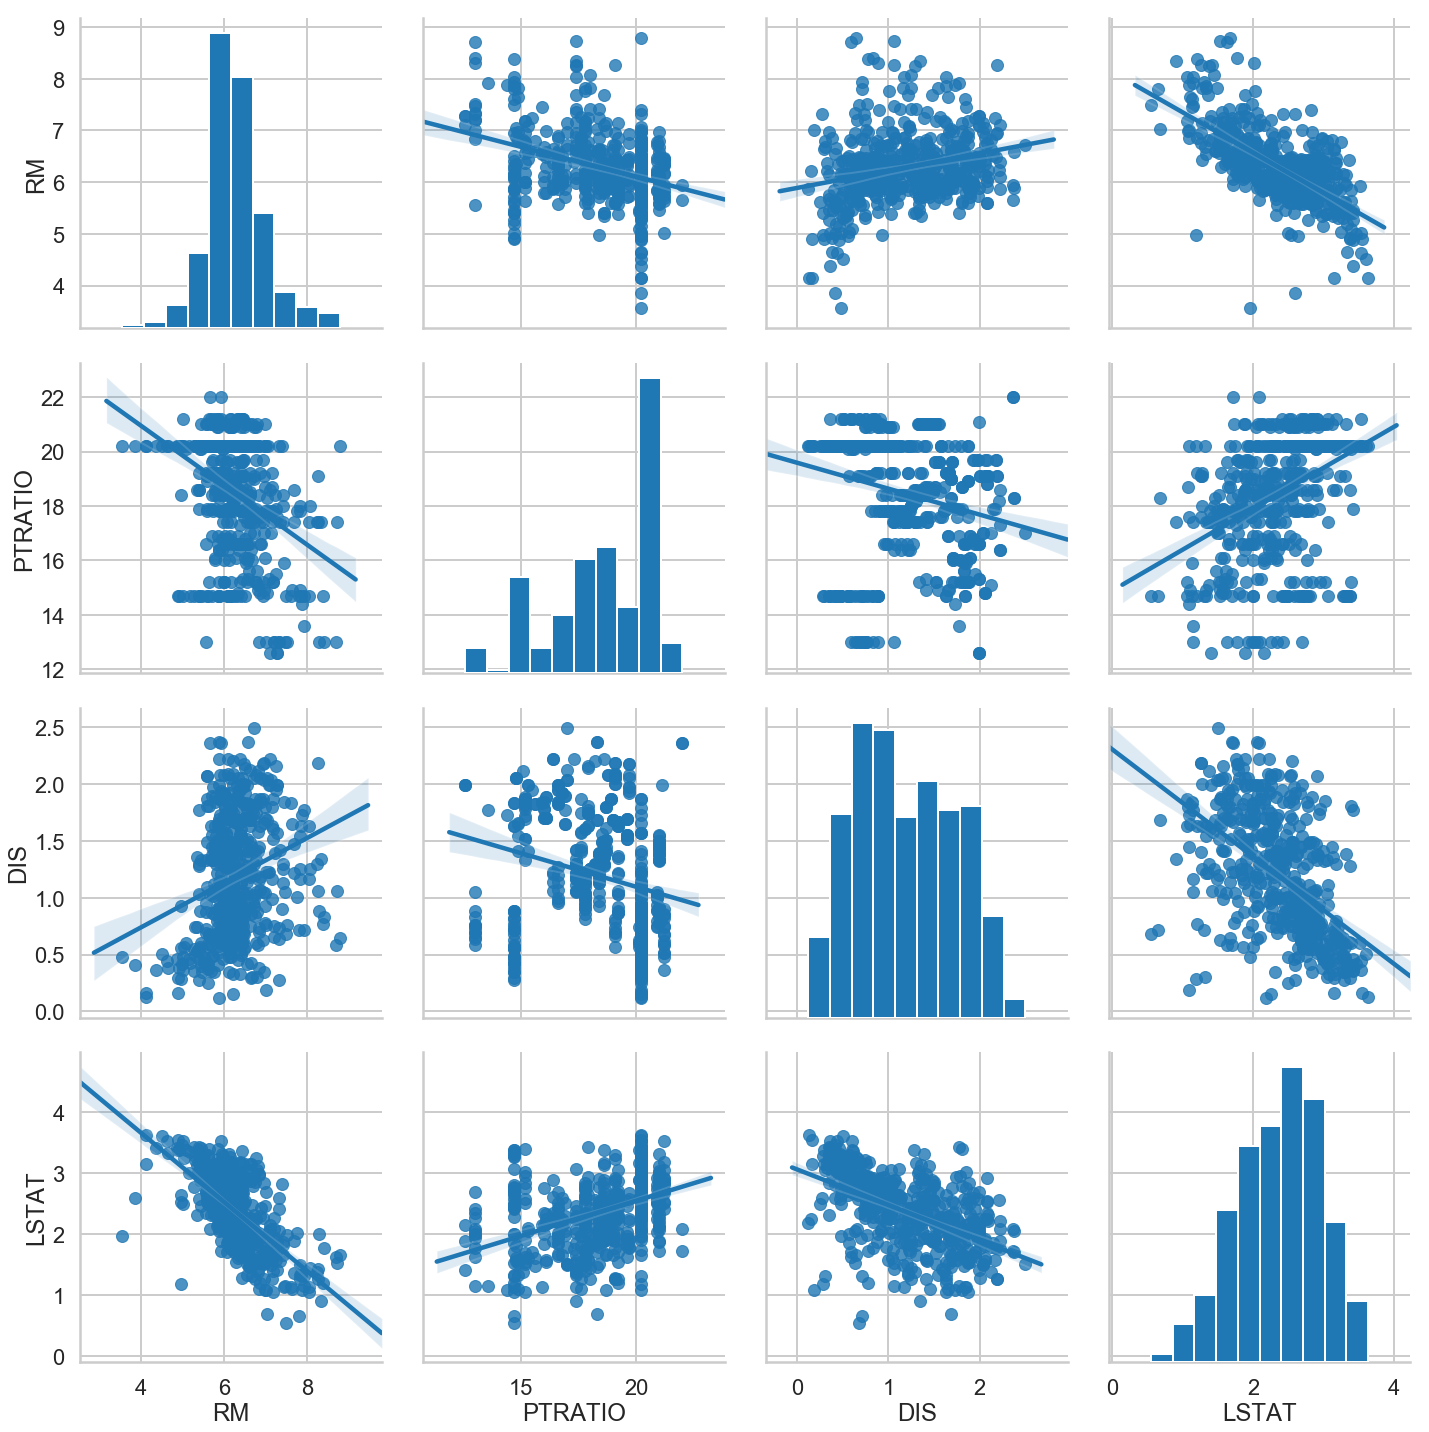

In [37]:
bos1 = bos[["RM", "PTRATIO", "DIS", "LSTAT"]] # creating a new df of the skewed variables, as noted
bos1["DIS"] = np.log(bos1["DIS"])             # over-writing with the log
bos1["LSTAT"] = np.log(bos1["LSTAT"])
pp = sns.pairplot(bos1, size=5, kind="reg")

Clearly, log(LSTAT) and RM have the strongest negative correlation amongst all pairs. This means that we should have either RM or log(LSTAT) in our model to avoid redundancy.  

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [38]:
# Import regression modules
import statsmodels.api as sm             #DWW used statsmodel in prior course Capstone, as t-values provided
from statsmodels.formula.api import ols

In [25]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()   # seems to follow R syntax (by design)
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 29 Jun 2017   Prob (F-statistic):           2.49e-74
Time:                        12:11:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

In [39]:
# your turn
md = ols('PRICE ~ np.log(CRIM) + RM + PTRATIO + np.log(DIS)', bos).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     185.5
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           2.03e-97
Time:                        10:47:51   Log-Likelihood:                -1610.3
No. Observations:                 506   AIC:                             3231.
Df Residuals:                     501   BIC:                             3252.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.1408      4.055     -1.021   

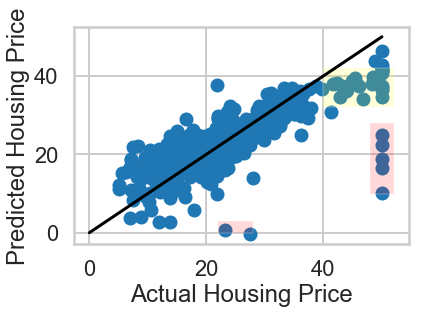

In [40]:
plt.scatter(x=bos.PRICE, y=md.fittedvalues)
plt.xlabel("Actual Housing Price")
plt.ylabel("Predicted Housing Price")
plt.plot([0, 50], [0, 50], 'k-')
plt.fill_between([40,52], 32, 42, facecolor='yellow', alpha = .15, interpolate=True)
plt.fill_between([48,52], 10, 28, facecolor='red', alpha = .15, interpolate=True)
plt.fill_between([22,28], 0, 3, facecolor='red', alpha = .15, interpolate=True)

On the plot above, the solid line indicates an ideal situation. For the housing prices greater than about 40, we observe a ceiling effect, shaded by yellow. The data points shaded in red appears to be outliers that try to underestimate the predicted housing price. Also, note that the p-value for the intercept is quite high, indicating not significant statistics for it (or failing to reject the null that intercept is 0). Therefore, we can use the regression through origin here.

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     2054.
Date:                Thu, 14 Feb 2019   Prob (F-statistic):          1.55e-309
Time:                        10:47:55   Log-Likelihood:                -1610.8
No. Observations:                 506   AIC:                             3230.
Df Residuals:                     502   BIC:                             3247.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
np.log(CRIM)    -1.1759      0.192     -6.132   

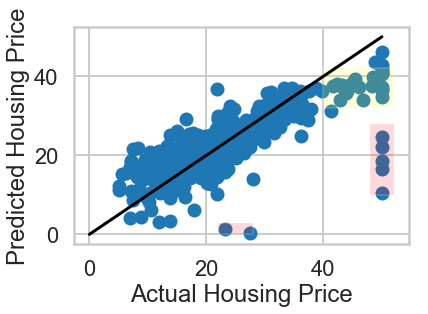

In [41]:
md = ols('PRICE ~ np.log(CRIM) + RM + PTRATIO + np.log(DIS) -1', bos).fit()
print(md.summary())
plt.scatter(x=bos.PRICE, y=md.fittedvalues)
plt.xlabel("Actual Housing Price")
plt.ylabel("Predicted Housing Price")
plt.plot([0, 50], [0, 50], 'k-')
plt.fill_between([40,52], 32, 42, facecolor='yellow', alpha = .15, interpolate=True)
plt.fill_between([48,52], 10, 28, facecolor='red', alpha = .15, interpolate=True)
plt.fill_between([22,28], 0, 3, facecolor='red', alpha = .15, interpolate=True)

Text(0, 0.5, 'residual')

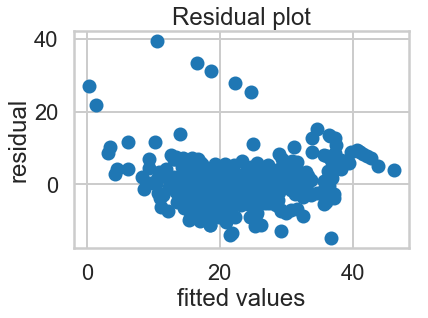

In [42]:
plt.scatter(x=md.fittedvalues, y=bos.PRICE-md.fittedvalues)
plt.title("Residual plot")
plt.xlabel("fitted values")
plt.ylabel("residual")

### Fitting Linear Regression using `sklearn`


In [43]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [44]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [45]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [33]:
#Adapted from http://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
def findStats(model, X, y):
    params = np.append(model.intercept_,model.coef_)
    predictions = model.predict(X)
    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))
    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b
    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    features = list(["INTERCEPT"])
    features.extend(X.columns)
    params = features#np.round(params,4)
    myDF3 = pd.DataFrame()
    myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t-values"],myDF3["p-values"] = [params,sd_b,ts_b,p_values]
    print(myDF3)

In [34]:
findStats(lm, X, bos.PRICE)

   Coefficients  Standard Errors  t-values  p-values
0     INTERCEPT            5.104     7.149     0.000
1          CRIM            0.033    -3.276     0.001
2            ZN            0.014     3.380     0.001
3         INDUS            0.061     0.339     0.735
4          CHAS            0.862     3.120     0.002
5           NOX            3.821    -4.658     0.000
6            RM            0.418     9.102     0.000
7           AGE            0.013     0.057     0.955
8           DIS            0.199    -7.398     0.000
9           RAD            0.066     4.608     0.000
10          TAX            0.004    -3.278     0.001
11      PTRATIO            0.131    -7.287     0.000
12            B            0.003     3.500     0.001
13        LSTAT            0.051   -10.366     0.000


In [35]:
X1 = bos.drop(['PRICE', 'INDUS', 'AGE'], axis = 1)
lm1 = LinearRegression()
lm1.fit(X1, bos.PRICE)
findStats(lm1, X1, bos.PRICE)

   Coefficients  Standard Errors  t-values  p-values
0     INTERCEPT            5.069     7.176     0.000
1          CRIM            0.033    -3.296     0.001
2            ZN            0.014     3.387     0.001
3          CHAS            0.854     3.185     0.002
4           NOX            3.536    -4.920     0.000
5            RM            0.406     9.343     0.000
6           DIS            0.186    -8.039     0.000
7           RAD            0.063     4.719     0.000
8           TAX            0.003    -3.488     0.001
9       PTRATIO            0.129    -7.337     0.000
10            B            0.003     3.508     0.000
11        LSTAT            0.047   -11.037     0.000


your turn

If using all variables, the p-value for the intercept is 0 (rejecting the null that intercept is 0). Therefore, we should be fitting intercept. However as we saw before (while using statsmodels) that the intercept was not statistically significantly different from 0, we could try and run the regression without fitting the intercept. If we do not want to fit intercept, we could use fit_intercept = False inside the LinearRegression() function as follows:

In [36]:
lm2 = LinearRegression(fit_intercept = False)
lm2.fit(X, bos.PRICE)
findStats(lm2, X, bos.PRICE)

   Coefficients  Standard Errors  t-values  p-values
0     INTERCEPT            5.363     0.000     1.000
1          CRIM            0.034    -2.666     0.008
2            ZN            0.014     3.375     0.001
3         INDUS            0.065    -0.058     0.953
4          CHAS            0.905     3.155     0.002
5           NOX            4.014    -0.718     0.473
6            RM            0.439    13.492     0.000
7           AGE            0.014    -0.520     0.603
8           DIS            0.210    -4.619     0.000
9           RAD            0.070     2.446     0.015
10          TAX            0.004    -2.376     0.018
11      PTRATIO            0.137    -2.855     0.004
12            B            0.003     5.314     0.000
13        LSTAT            0.053    -7.829     0.000


Let's use the intercept and get residuals using the first model, lm (using intercept and all 13 variables).

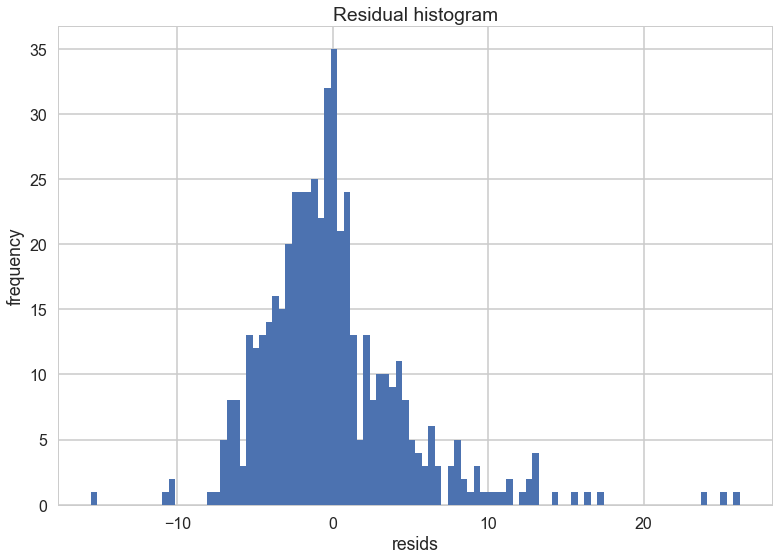

In [37]:
from scipy.stats import probplot, shapiro
predicted = lm.predict(X)
resid = bos.PRICE-predicted
plt.hist(resid, 100)
plt.title("Residual histogram")
plt.xlabel("resids")
plt.ylabel("frequency")

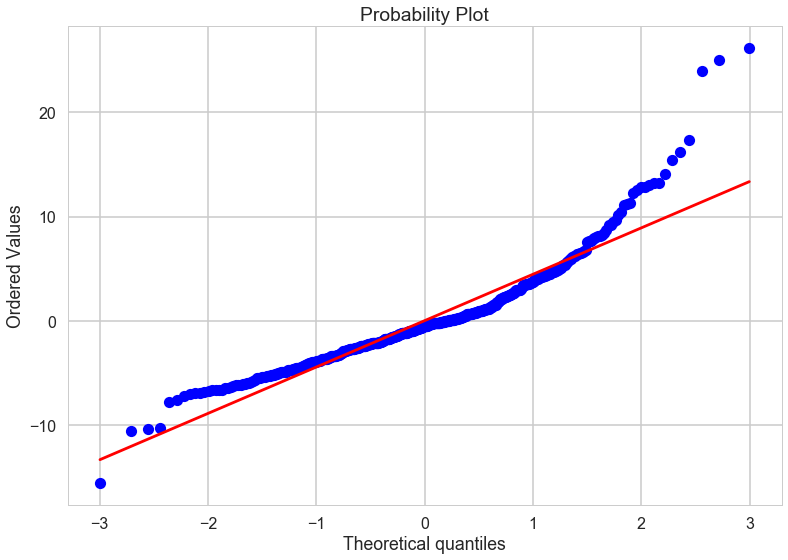

In [38]:
qq = probplot(resid, plot=plt)

In [39]:
print("Mean: ", np.mean(resid))
print("Variance: ", (np.std(resid))**2)
print("Shapiro test: ", shapiro(resid))

Mean:  -1.0914413861058061e-14
Variance:  21.897779217687503
Shapiro test:  (0.9013519287109375, 1.4713192250017487e-17)


The mean of the residuals is very close to 0 with a finite variance. However, the residuals are not noramlly distributed as can be seen from histogram and q-q plot. Also, the normality test (Shapiro test) suggests that the residual distribution is significantly different from a normal distribution.

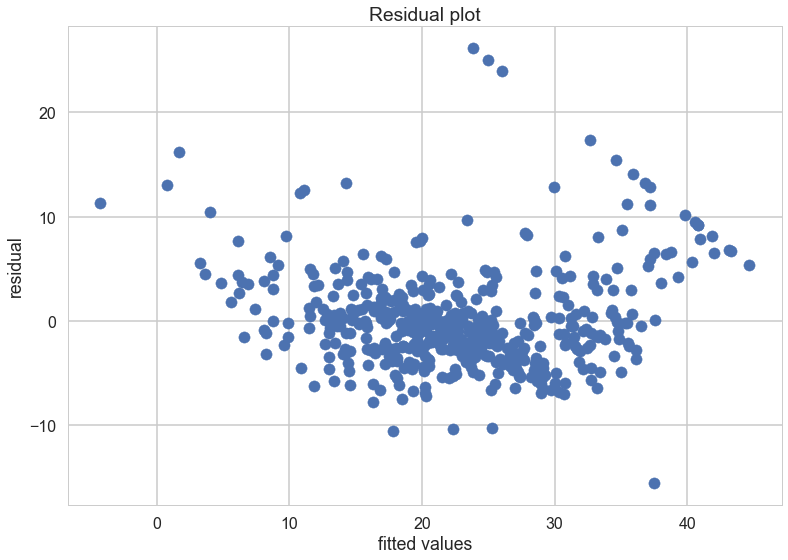

In [40]:
plt.scatter(x=predicted, y=resid)
plt.title("Residual plot")
plt.xlabel("fitted values")
plt.ylabel("residual")

Normality does not necessarlity implies i.i.d. For example, the residual data looks identically distributed (almost same variance across all fitted values). However, the data seems correlated with fitted values (with a non-linear, like parabolic trend). This means that the residuals are not independently distributed.

Linear regression assumes normal distribution for the residuals but not for the independent and dependent variables. For y, the distribution should be normal at a given value of x but not for all values of x. So, the answer is False.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [41]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280364015


In [42]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [43]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [44]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

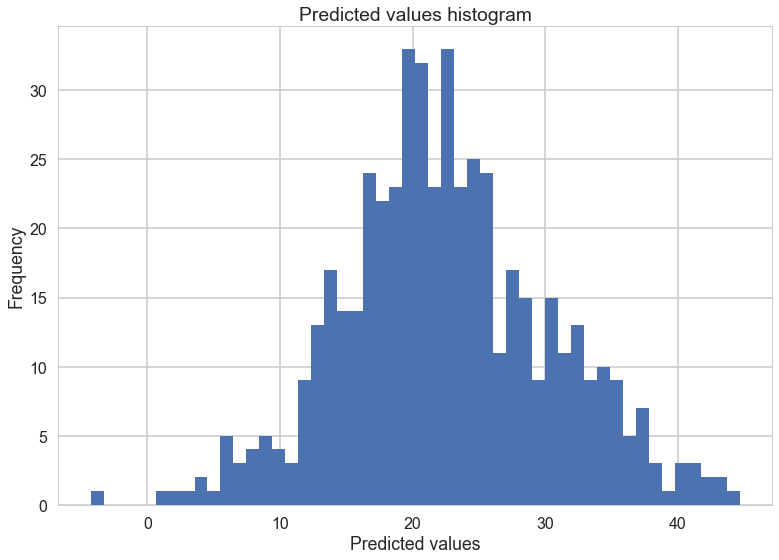

In [45]:
# your turn
predicted = lm.predict(X)
plt.hist(predicted, 50)
plt.title("Predicted values histogram")
plt.xlabel("Predicted values")
plt.ylabel("Frequency")

In [46]:
from scipy.stats import describe
print("Stats of predicted: ", describe(predicted))

Stats of predicted:  DescribeResult(nobs=506, minmax=(-4.2830093419222806, 44.673399227723536), mean=22.53280632411068, variance=62.645582437371928, skewness=0.11077348255970675, kurtosis=0.10314181078832751)


The distribution of the fitted values is pretty normal with a unimodal distribution. The skewness = 0.11 suggests that the distribution is slightly positively skewed, probably due to outliers. There is a data point which is negative (-4.28) for the predicted house price. This is not normal becasue the price cannot have negative numbers. The possible reason for this abnormal prediction is related with outliers mentioned previously that causes the underestimation in predictions. We also observe kurtosis = 0.1, indicating a very light tail.

In order to improve the model and get rid of negative predictions, we should remove the outliers in the input data first.

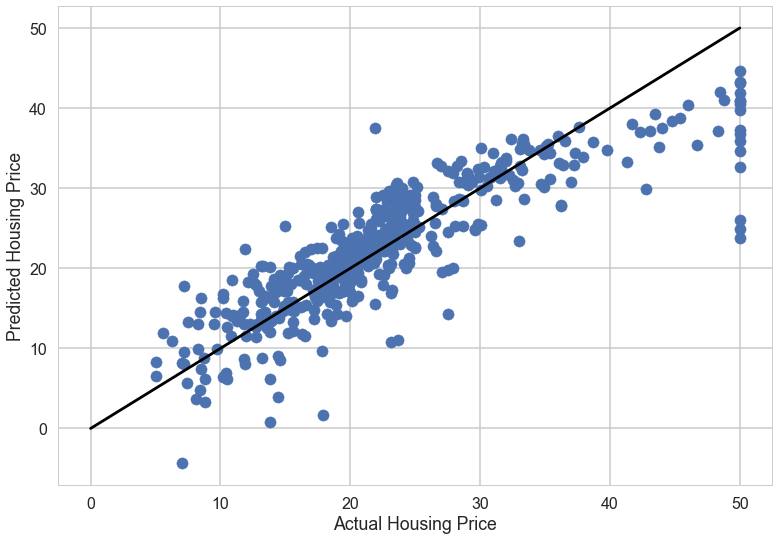

In [47]:
plt.scatter(x=bos.PRICE, y=predicted)
plt.xlabel("Actual Housing Price")
plt.ylabel("Predicted Housing Price")
plt.plot([0, 50], [0, 50], 'k-')
#plt.fill_between([40,52], 32, 42, facecolor='yellow', alpha = .15, interpolate=True)
#plt.fill_between([48,52], 10, 28, facecolor='red', alpha = .15, interpolate=True)
#plt.fill_between([22,28], 0, 3, facecolor='red', alpha = .15, interpolate=True)

Statsmodels has advantage of providing statistical summary (like t score, p-values) for all predictors and for intercept. The sklearn appraoch does not have this feature. This is the reason I defined a function manually to get the statistical summary. There is not much difference in the CPU time between both appraoches. The sklearn has advantage in terms of writing the equation. In sklearn, we just need to split the data to get features (X) and labels (y), and provide X and y as input. In case of statsmodels, we need to explicitly write the expression.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [48]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149872


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [49]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

5.80189651524e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

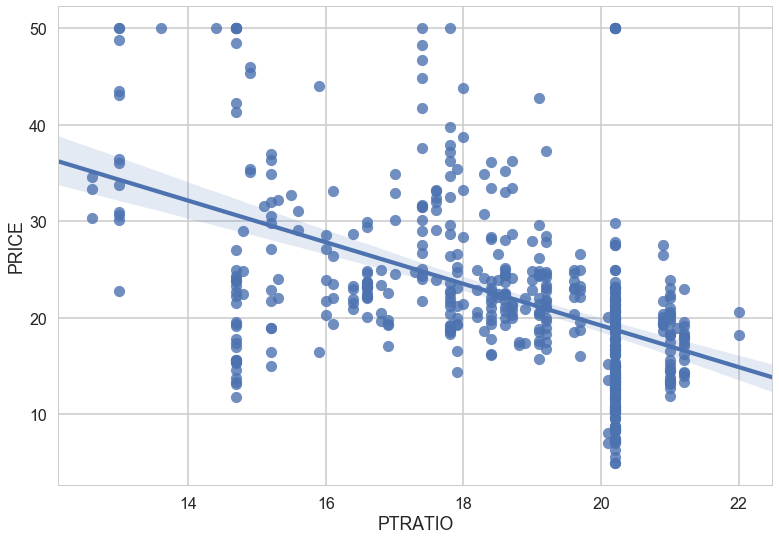

In [50]:
# your turn
sns.regplot(x="PTRATIO", y="PRICE", data=bos)

In [79]:
md1 = ols('PRICE ~ PTRATIO', bos).fit()
print(md1.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 29 Jun 2017   Prob (F-statistic):           1.61e-34
Time:                        16:15:04   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

Both slope and intercept are significantly different from 0. The model indicates that the average housing price is 62.35 when the pupil-teacher ratio is 0 (or no pupils in that area). If the PTRATIO increases by 1, the housing price decreases by 2.16.


The adjusted $R^2$ value is 0.256. This means that 25.6% of the total variation in housing price is described by the model with only PTRATIO as predictor variable.


The F-statistic is 175.1 with p-value of 0. This means that PTRATIO coefficient found in the model are statistically significantly different from 0.

The F-statistic is square of the t value for PTRATIO in this case (single variable regression).

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [80]:
# your turn
md2 = ols('PRICE ~ CRIM + RM + PTRATIO -1', bos).fit()
print(md2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     2721.
Date:                Thu, 29 Jun 2017   Prob (F-statistic):          2.10e-310
Time:                        16:15:16   Log-Likelihood:                -1612.9
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     503   BIC:                             3244.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.2013      0.032     -6.282      0.0

F-statistic: 244.2 (p-value = 0). This means that at least one of the variables included in the model is a significant predictor.

Adj. $R^2$: 0.591. This means that 59.1% of the variation in housing price is described by the variation in CRIM, RM and PTRATIO together.

All variables are significant in predicting housing prices. The intercept can be avoided in the model because its p-value is 0.413. In other words, the intercept is not significantly different from 0. The most important factor in predicting the housing price is the RM. For each additional room, the housing price increases by 7.38. The other two variables have negative correlation with the housing price. When pupil-teacher ratio increases by 1, the housing price decreases by 1, and when the per capita crime rate increases by 5, the housing price decreases by 1.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [64]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [81]:
md3 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT -1', bos).fit()
print(md3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2540.
Date:                Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                        16:15:28   Log-Likelihood:                -1559.9
No. Observations:                 506   AIC:                             3128.
Df Residuals:                     502   BIC:                             3145.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.0890      0.031     -2.899      0.0

Adding two more variables (LSTAT and CHAS) to the model decreases the value of AIC, improving the model. The p-value for F-statistic is 0, indicating that not all coefficients are 0. 


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [88]:
# Your turn.
md2 = ols('PRICE ~ np.log(CRIM) + RM + PTRATIO + np.log(DIS) -1', bos).fit()
print(md2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     2047.
Date:                Thu, 29 Jun 2017   Prob (F-statistic):          3.59e-309
Time:                        16:30:36   Log-Likelihood:                -1611.7
No. Observations:                 506   AIC:                             3231.
Df Residuals:                     502   BIC:                             3248.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
np.log(CRIM)    -1.1496      0.192     -5.983   

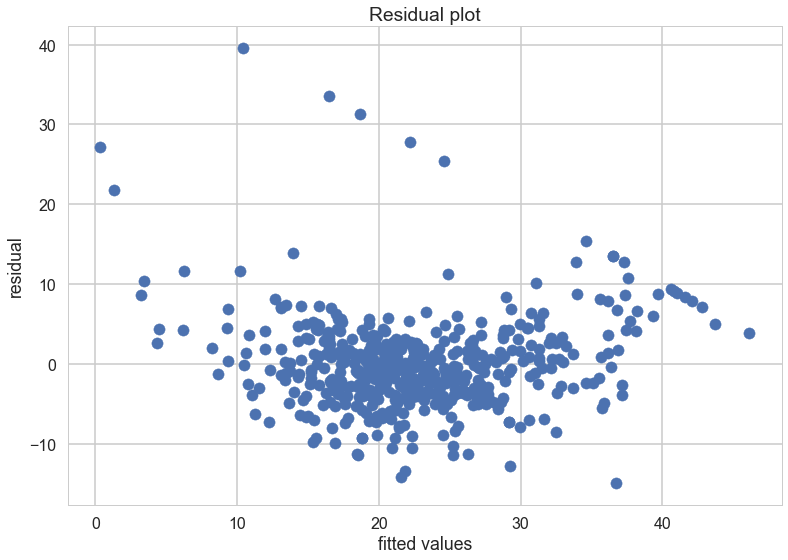

In [89]:
plt.scatter(x=md2.fittedvalues, y=bos.PRICE - md2.fittedvalues)
plt.title("Residual plot")
plt.xlabel("fitted values")
plt.ylabel("residual")

The residual plot shows a dependency of the residual on fitted values. This is a violation of the assumption made in the linear regression model that the residuals should be independently distributed. 

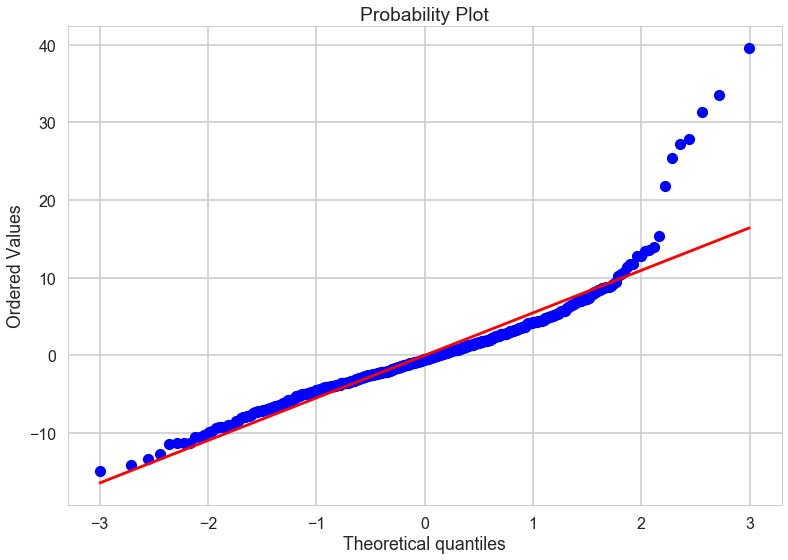

In [90]:
qq = probplot(bos.PRICE - md2.fittedvalues, plot=plt)

The q-q plot shows that the residuals are not normally distributed. There is a positive skewness in the residual data. This is another violation of the assumption in the linear model.


The residual plot is good in checking if the residuals are independently distributed or not. It is possible to have correlated residuals even when the distribution of residuals is normal. This means that the quantile plot, which is used to check the normality, is not useful for checking any dependency. Also, the quantile plot is not capable of testing homoscedasticity, i.e. varying variance. The residual plot can be used to check if the data is homoscedastic or not.


Let's generate some plots to see outliers and high leverage points.

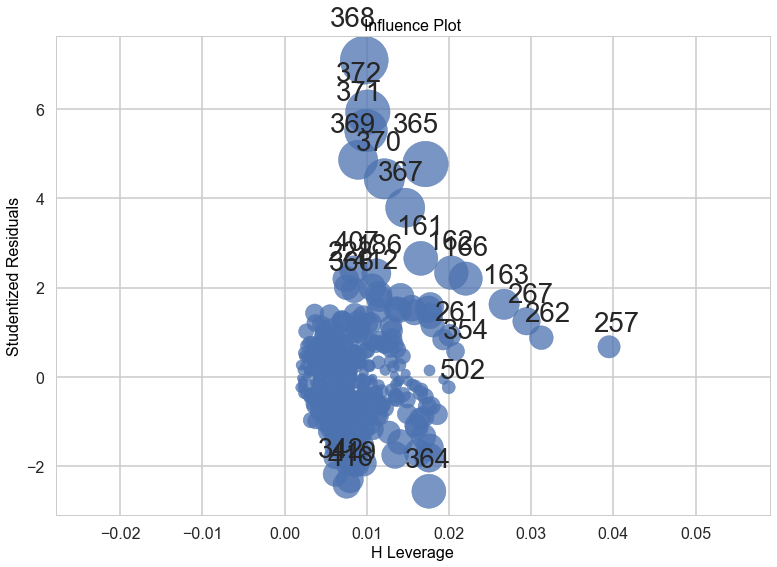

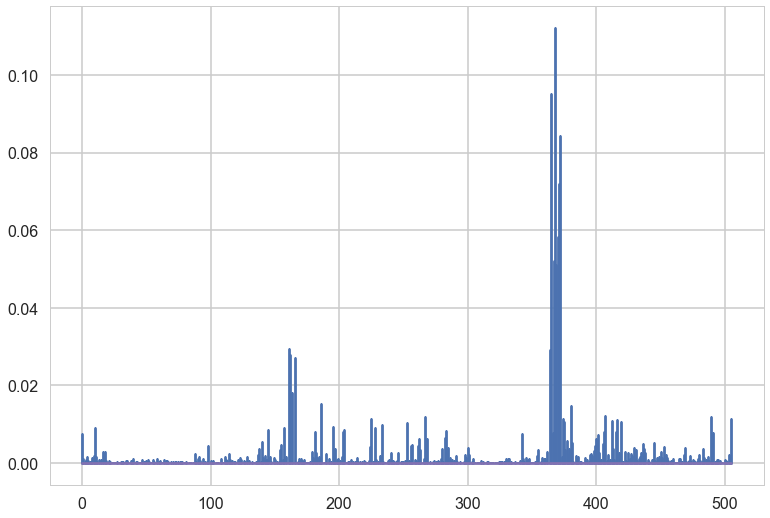

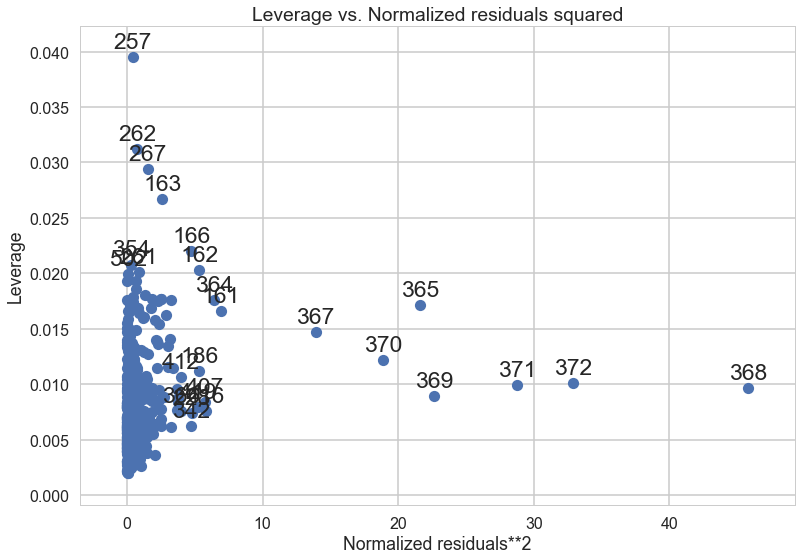

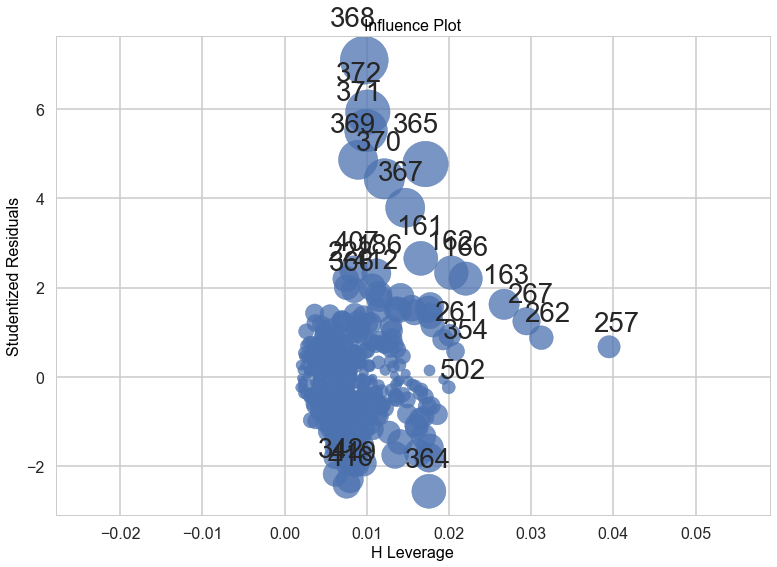

In [91]:
influence = md2.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(md2)
influence_plot(md2)

Looking at the influence plot, following points are possible outliers (high residuals and high cook's distance): 365, 367, 368, 369, 370, 371, 372.

From the leverage plot, we can see that following points have high leverage: 163, 257, 262, 267.


Now, let's understand these data points by looking at all the variables.

In [92]:
outlier_index = [365, 367, 368, 369, 370, 371, 372]
hl_index = [163, 257, 262, 267]
out_hl_index = list(set(outlier_index) & set(hl_index))

cols = ["CRIM", "RM", "PTRATIO", "DIS", "PRICE"]
df = bos[cols]
df["logCRIM"] = np.log(df["CRIM"])
df["logDIS"] = np.log(df["DIS"])
df = df.drop(["CRIM", "DIS"], axis = 1)
newcol = ["logCRIM", "RM", "PTRATIO", "logDIS", "PRICE"]
df = df[newcol]

outlier_df = df.iloc[outlier_index]
hl_df = df.iloc[hl_index]
out_hl_df = df.iloc[out_hl_index]

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [93]:
outlier_df 

,logCRIM,RM,PTRATIO,logDIS,PRICE
365,1.516417,3.561,20.2,0.478220,27.5
367,2.604333,3.863,20.2,0.412507,23.1
368,1.588872,4.970,20.2,0.287057,50.0
369,1.735186,6.683,20.2,0.305055,50.0
370,1.877748,7.016,20.2,0.184320,50.0
371,2.222708,6.216,20.2,0.156234,50.0
372,2.112302,5.875,20.2,0.121864,50.0


Outliers: Except for 365 and 367, all data points in the outlier table have housing price = 50 (exactly 50). This sounds like a data entering error. Or it may also be due to the presence of a default value in the data system.

In [94]:
hl_df

,logCRIM,RM,PTRATIO,logDIS,PRICE
163,0.418065,8.375,14.7,0.771034,50.0
257,-0.491775,8.704,13.0,0.588342,50.0
262,-0.653657,8.398,13.0,0.827897,48.8
267,-0.547593,8.297,13.0,0.884428,50.0


Points 163, 257 and 267 also have housing price of 50. There are no overlapping points.

Lets try to visualize these points on the scatter plot.

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


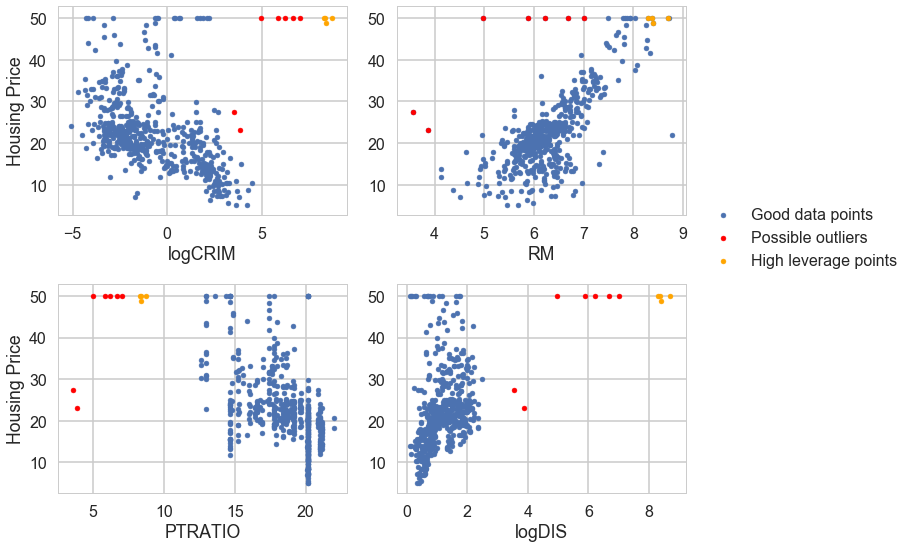

In [98]:
cols = df.columns
ms = 24
r = 2
c = 2
fi2, ax2 = plt.subplots(r, c, figsize=(10,8))

for i in np.arange(r):
    for j in np.arange(c):
        cid = j + (i*c)
        ax2[i,j].scatter(df[cols[cid]], df.PRICE, s=ms, label="Good data points")
        ax2[i,j].set_xlabel(cols[cid])
        if j==0:
            ax2[i,j].set_ylabel("Housing Price")
        ax2[i,j].scatter(outlier_df.RM, outlier_df.PRICE, s = ms, c="red", label="Possible outliers")
        ax2[i,j].scatter(hl_df.RM, hl_df.PRICE, c="orange", s=ms, label = "High leverage points")
        #ax2[i,j].scatter(out_hl_df.RM, out_hl_df.PRICE, s=ms, c="purple", label = "Both possible outlier and high leverage points")
        plt.legend(bbox_to_anchor=(1.05, 1.4), loc=2, borderaxespad=0.)
plt.tight_layout()

Should we remove all possible outliers and high leverage points? It is not clear. Lets create two models:

Model1. Out of possible outliers and high leverage data points, remove the ones with price = 50, and rerun the model

Model2. Remove all possible outliers and high leverage data points and rerun the model


We can then compare these two models, along with the model (Model0) with all data points that we created in the beginning of part 5.

Model1:

In [100]:
index_50 = [163, 257, 267, 368, 369, 370, 371, 372]
m1_df = df.drop(df.index[index_50])
md4 = ols('PRICE ~ logCRIM + RM + PTRATIO + logDIS - 1', m1_df).fit()
print(md4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2807.
Date:                Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:14:17   Log-Likelihood:                -1494.4
No. Observations:                 498   AIC:                             2997.
Df Residuals:                     494   BIC:                             3014.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
logCRIM       -1.1094      0.160     -6.930      0.0

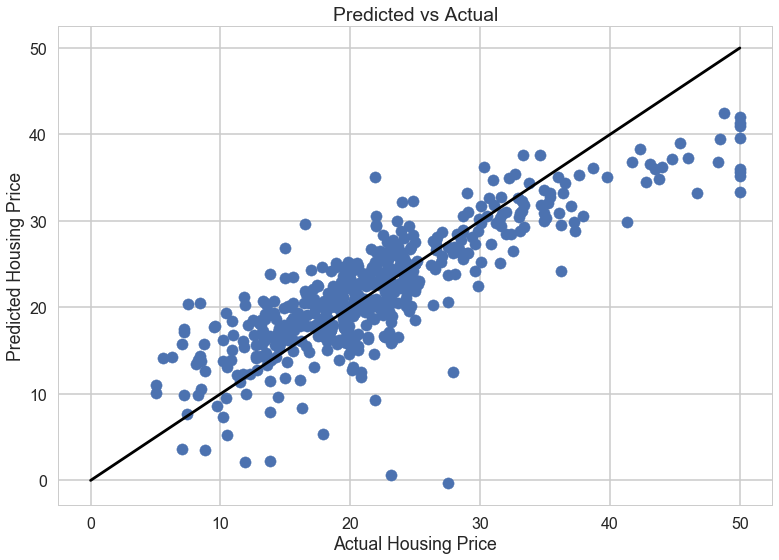

In [101]:
plt.scatter(x=m1_df.PRICE, y=md4.fittedvalues)
plt.xlabel("Actual Housing Price")
plt.ylabel("Predicted Housing Price")
plt.plot([0, 50], [0, 50], 'k-')
plt.title("Predicted vs Actual")

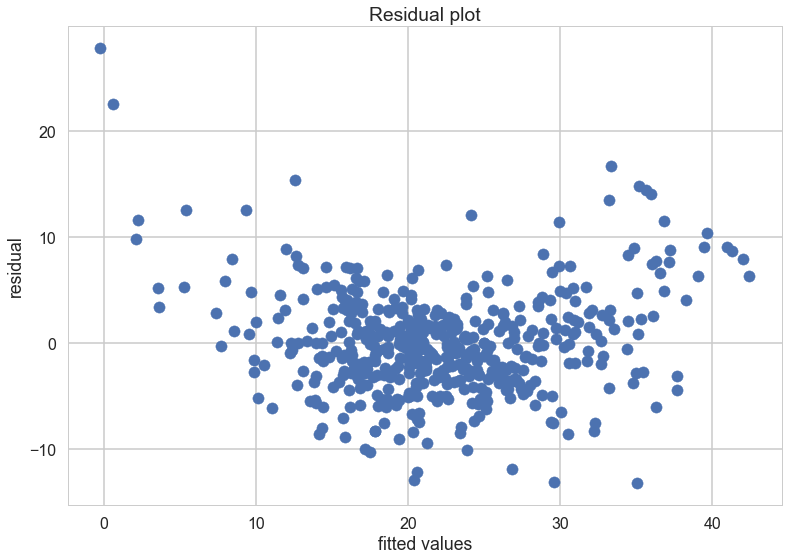

In [102]:
plt.scatter(x=md4.fittedvalues, y=m1_df.PRICE - md4.fittedvalues)
plt.title("Residual plot")
plt.xlabel("fitted values")
plt.ylabel("residual")

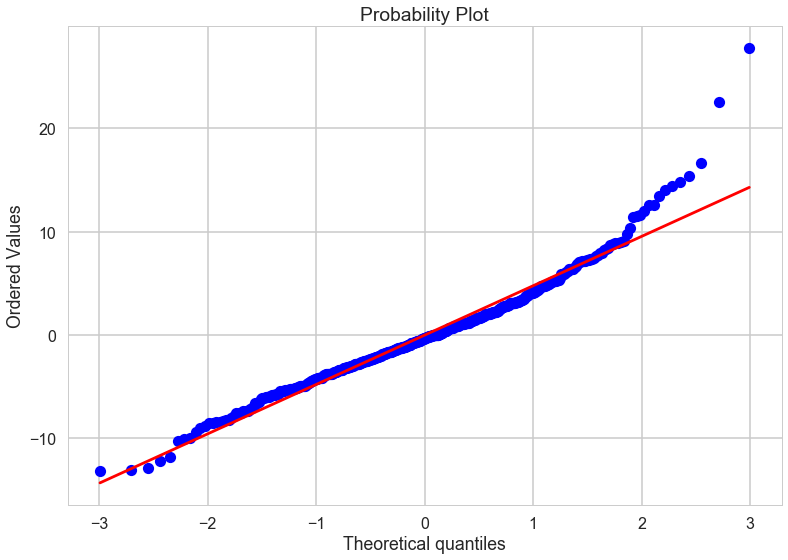

In [103]:
qq1 = probplot(m1_df.PRICE - md4.fittedvalues, plot=plt)

<Container object of 3 artists>

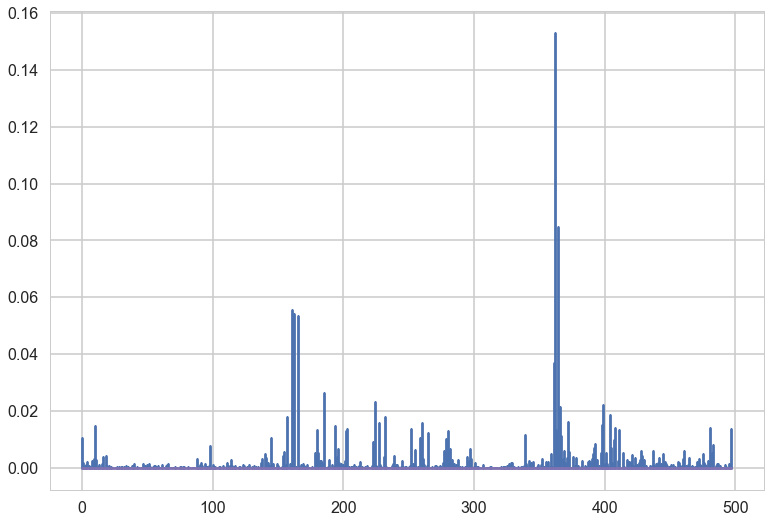

In [104]:
influence = md4.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

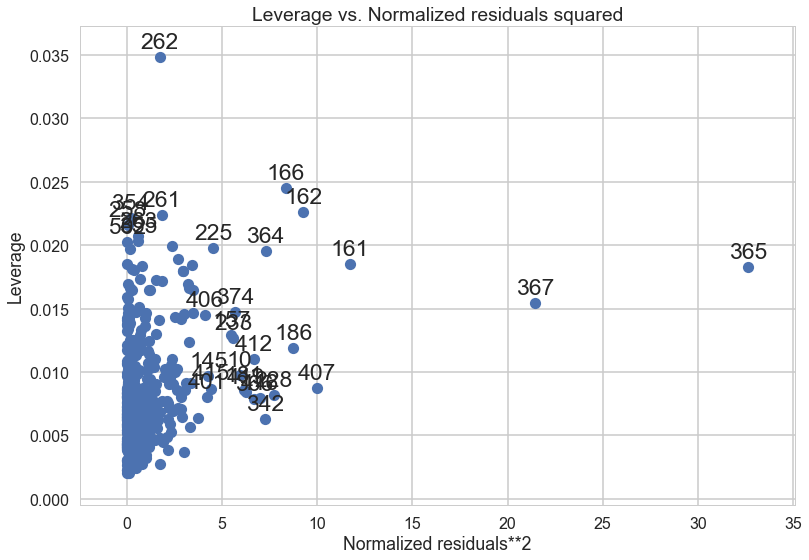

In [105]:
l1 = plot_leverage_resid2(md4)

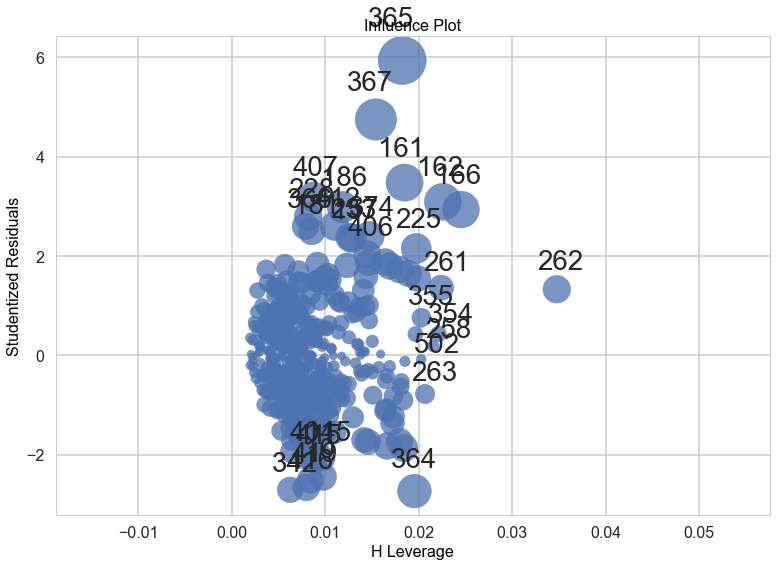

In [106]:
i1 = influence_plot(md4)

Model2:

In [115]:
m2_df = df.drop(df.index[list(set(outlier_index) | set(hl_index))])
md5 = ols('PRICE ~ logCRIM + RM + PTRATIO + logDIS - 1', m2_df).fit()
print(md5.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     3125.
Date:                Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:17:46   Log-Likelihood:                -1456.7
No. Observations:                 495   AIC:                             2921.
Df Residuals:                     491   BIC:                             2938.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
logCRIM       -1.1065      0.151     -7.320      0.0

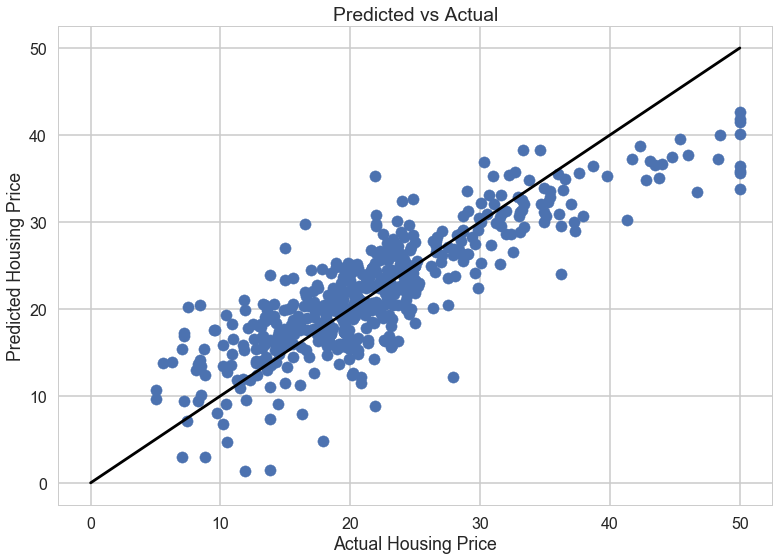

In [108]:
plt.scatter(x=m2_df.PRICE, y=md5.fittedvalues)
plt.xlabel("Actual Housing Price")
plt.ylabel("Predicted Housing Price")
plt.plot([0, 50], [0, 50], 'k-')
plt.title("Predicted vs Actual")

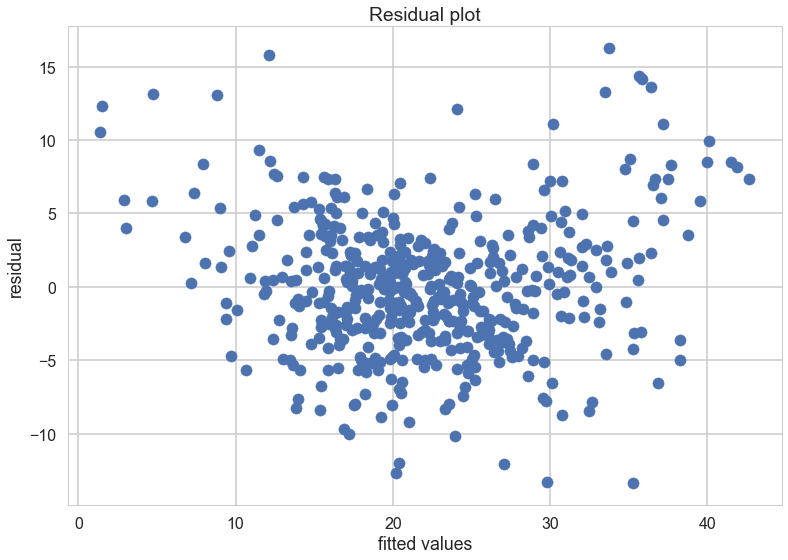

In [109]:
plt.scatter(x=md5.fittedvalues, y=m2_df.PRICE - md5.fittedvalues)
plt.title("Residual plot")
plt.xlabel("fitted values")
plt.ylabel("residual")

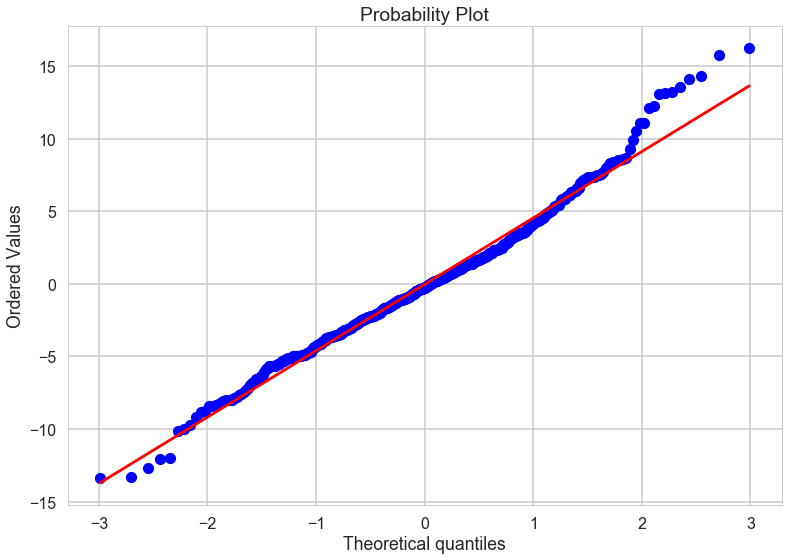

In [110]:
qq2 = probplot(m2_df.PRICE - md5.fittedvalues, plot=plt)

<Container object of 3 artists>

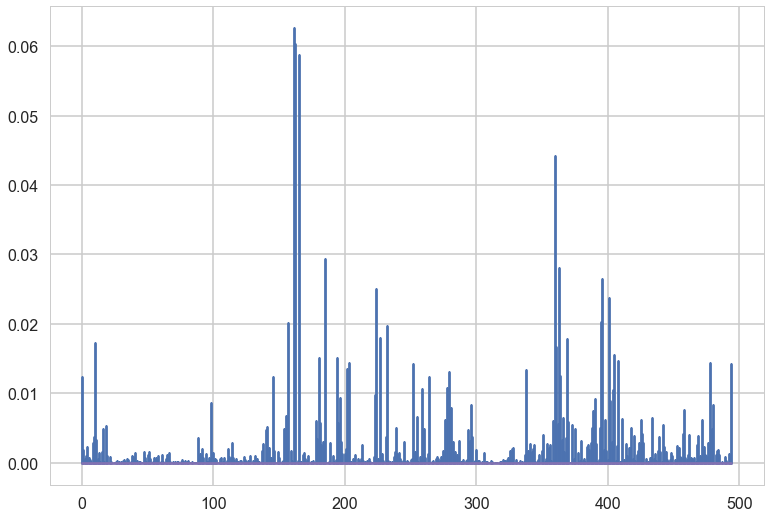

In [111]:
influence = md5.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

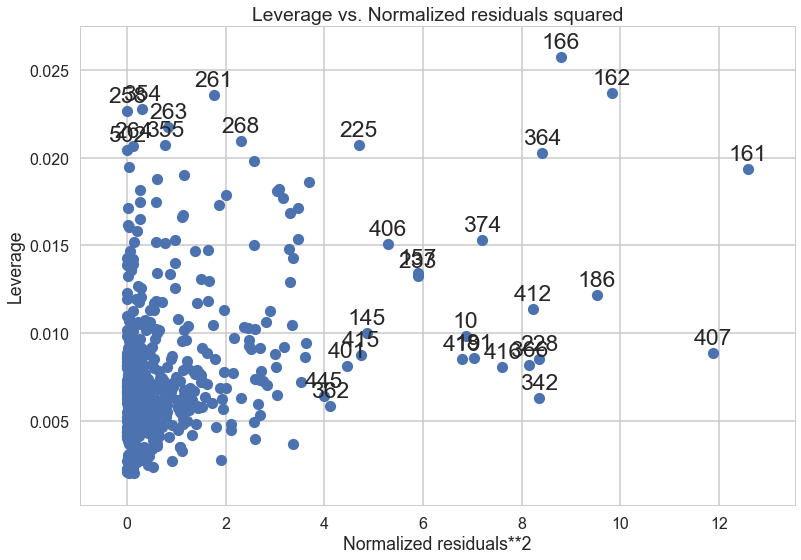

In [112]:
l2 = plot_leverage_resid2(md5)

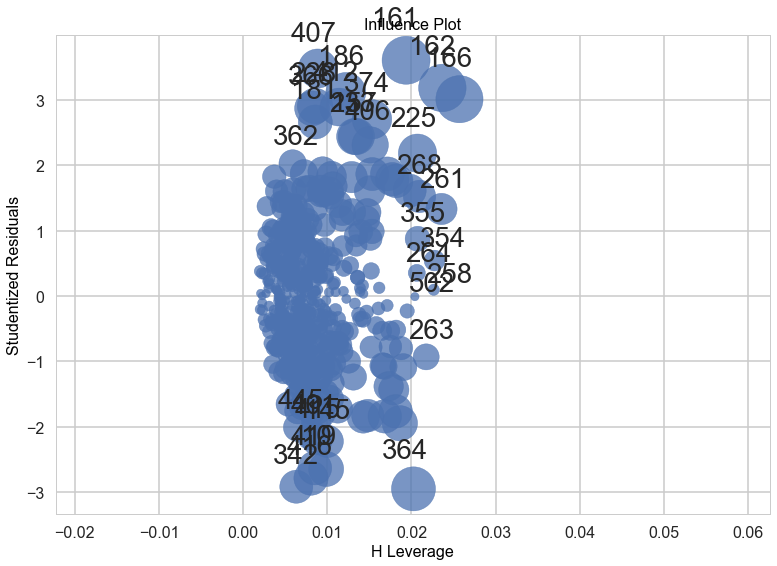

In [113]:
i2 = influence_plot(md5)

Comparing between model 1 and model 2, model 2 definitely gives much better results. The AIC in model 2 is 2921, against 2997 in model 1. Also, the adjusted $R^2$ for model 2 is 0.962 against 0.958 in model 1. For the model with all data points, the AIC was 3231 and adjusted $R^2$ was 0.942.


The logDIS variable turns out to be not significant in model1 and model2. Lets try to remove the logDIS and see if we get better results. Lets call this model3.


Model3:

In [124]:
m3_df = df.drop(df.index[list(set(outlier_index) | set(hl_index))])
md6 = ols('PRICE ~ logCRIM + RM + PTRATIO - 1', m3_df).fit()
print(md6.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     4171.
Date:                Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:23:24   Log-Likelihood:                -1457.0
No. Observations:                 495   AIC:                             2920.
Df Residuals:                     492   BIC:                             2933.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
logCRIM       -1.0299      0.107     -9.632      0.0

Removing logDIS from the model does not change the results, so lets remove that and have model 3 as our final model.

In [129]:
md6.params

logCRIM   -1.029948
RM         6.877023
PTRATIO   -1.189791
dtype: float64

In [155]:
AIC = [md2.aic, md4.aic, md5.aic, md6.aic]
AdjR2 = [md2.rsquared_adj, md4.rsquared_adj, md5.rsquared_adj, md6.rsquared_adj]
Fvalue = [md2.fvalue, md4.fvalue, md5.fvalue, md6.fvalue]
Fpvalue = [md2.f_pvalue, md4.f_pvalue, md5.f_pvalue, md6.f_pvalue]

logCRIM = [md2.params[0], md4.params[0], md5.params[0], md6.params[0]]
RM = [md2.params[1], md4.params[1], md5.params[1], md6.params[1]]
PTRATIO = [md2.params[2], md4.params[2], md5.params[2], md6.params[2]]
logDIS = [md2.params[3], md4.params[3], md5.params[3], np.nan]

logCRIMStdEr = [md2.bse[0], md4.bse[0], md5.bse[0], md6.bse[0]]
RMStdEr = [md2.bse[1], md4.bse[1], md5.bse[1], md6.bse[1]]
PTRATIOStdEr = [md2.bse[2], md4.bse[2], md5.bse[2], md6.bse[2]]
logDISStdEr = [md2.bse[3], md4.bse[3], md5.bse[3], np.nan]

comparison_df = pd.DataFrame({"Adj. R-squared":AdjR2, "AIC": AIC, "Fvalue": Fvalue, "F_pvalue": Fpvalue,
                              "logCRIM": logCRIM,
                             "logCRIMStdEr": logCRIMStdEr, "RM": RM, "RMStdEr": RMStdEr,
                             "PTRATIO": PTRATIO, "PTRATIOStdEr": PTRATIOStdEr,
                             "logDIS": logDIS, "logDISStdEr": logDISStdEr}, index=["Model 0",
                                                                                            "Model 1", "Model 2",
                                                                                            "Model 3"])
comparison_df = comparison_df[["Adj. R-squared", "AIC", "Fvalue", "F_pvalue", "logCRIM",
                              "logCRIMStdEr", "RM", "RMStdEr", "PTRATIO", "PTRATIOStdEr", 
                              "logDIS", "logDISStdEr"]]

## Comparison of all models

In [156]:
comparison_df

,Adj. R-squared,AIC,Fvalue,F_pvalue,logCRIM,logCRIMStdEr,RM,RMStdEr,PTRATIO,PTRATIOStdEr,logDIS,logDISStdEr
Model 0,0.941774,3231.360836,2047.055206,3.593884e-309,-1.149634,0.192139,6.981185,0.253813,-1.084009,0.084985,-1.870452,0.725312
Model 1,0.957521,2996.834233,2807.363799,0.000000e+00,-1.109420,0.160098,6.723820,0.222254,-1.103790,0.073308,-0.495559,0.611740
Model 2,0.961897,2921.441873,3125.011097,0.000000e+00,-1.106531,0.151172,6.912768,0.215632,-1.178397,0.070964,-0.414408,0.577972
Model 3,0.961934,2919.959883,4170.629081,0.000000e+00,-1.029948,0.106927,6.877023,0.209686,-1.189791,0.069128,NaN,NaN


#### Model 3 is the best among all other models. The AIC is minimum and F value (statistically siginificant) is maximum for the model 3. Finally, Adj. $R^2$ is also maximum for the model 3.